In [1]:
import pandas as pd
import MarineDNA as md
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering

In [2]:
file1 = "../../../Data/Flyer2018_16S_table_counts.tsv"
asvs1 = pd.read_csv(file1, index_col=0, sep="\t").transpose()

In [9]:
pca = [md.samplePCA(asvs1, 3) for i in range(10)]
test_df = pca[1]["df"]
test_scores = pd.DataFrame(pca[1]["scores"])

In [12]:
agg_clust = AgglomerativeClustering(n_clusters = 3, metric = "euclidean", linkage = "ward")
labels = agg_clust.fit_predict(test_df)
labels = labels.astype(str)
labels

array(['0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '2', '2', '2', '2', '0', '2', '0', '2', '0',
       '0', '2', '0', '2', '0', '2', '0', '2', '2', '2'], dtype='<U21')

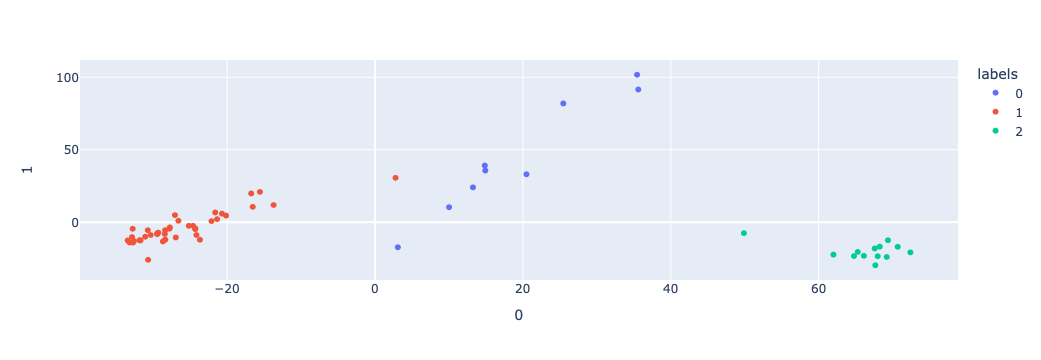

In [11]:
test_scores['labels'] = labels
fig = px.scatter(
    test_scores,
    x = 0,
    y = 1,
    color = "labels"
)
fig.show()

In [14]:
def sampleClust(df, n_pcs, n_clusts):
    x = md.samplePCA(asvs1, n_pcs)
    test_df = x["df"]
    test_scores = pd.DataFrame(x["scores"])
    agg_clust = AgglomerativeClustering(n_clusters = n_clusts, metric = "euclidean", linkage = "ward")
    labels = agg_clust.fit_predict(test_df)
    return labels.astype(str)

sample_label = sampleClust(asvs1, 5, 3)
sample_label

array(['0', '2', '2', '2', '2', '2', '0', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '1', '1', '1'], dtype='<U21')

In [18]:
label_dist = [sampleClust(asvs1, 5, 3) for i in range(10)]
pd.DataFrame(label_dist).transpose()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,1,1,1,1,1,1,1
58,0,0,0,0,0,0,0,0,0,0
59,1,1,1,1,1,1,1,1,1,1
60,1,1,1,1,1,1,1,1,1,1
